11490434/11490434 [==============================] - 6s 1us/step
Epoch 1/10

235/235 [==============================] - 3s 9ms/step - loss: 0.2125 - val_loss: 0.1355
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1176 - val_loss: 0.1025
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0963 - val_loss: 0.0891
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0862 - val_loss: 0.0817
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0802 - val_loss: 0.0776
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0765 - val_loss: 0.0744
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0741 - val_loss: 0.0725
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0724 - val_loss: 0.0713
Epoch 9/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0712 - val_loss: 0.0701
Epoch 10/10
1/1 [================

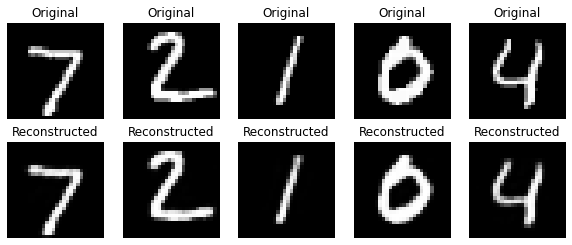

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train, _), (X_test, _) = datasets.mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images
X_train_flat = X_train.reshape(-1, 28 * 28)
X_test_flat = X_test.reshape(-1, 28 * 28)

# Define the autoencoder model
def build_autoencoder():
    # Encoder
    encoder_input = layers.Input(shape=(28 * 28,))
    encoder_output = layers.Dense(128, activation='relu')(encoder_input)
    
    # Decoder
    decoder_output = layers.Dense(28 * 28, activation='sigmoid')(encoder_output)
    
    # Autoencoder
    autoencoder = models.Model(encoder_input, decoder_output)
    
    return autoencoder

# Build the autoencoder
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train_flat, X_train_flat, epochs=10, batch_size=256, shuffle=True, validation_data=(X_test_flat, X_test_flat))

# Reconstruct some images
num_images = 5
reconstructed_images = autoencoder.predict(X_test_flat[:num_images])

# Plot original and reconstructed images
plt.figure(figsize=(10, 4))
for i in range(num_images):
    # Original image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.title('Original')
    
    # Reconstructed image
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed')
plt.show()